In [2]:
%pylab inline
#% config InlineBackend.figure_format = 'svg'

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

Populating the interactive namespace from numpy and matplotlib


In [3]:
book_movie = pd.read_csv('book_movie_outliers_removed.csv')

In [4]:
book_movie.columns

Index(['book_title', 'book_rating', 'book_number_ratings',
       'book_year_published', 'popularity', 'release_date', 'movie_runtime',
       'movie_rating', 'movie_number_ratings', 'genres'],
      dtype='object')

In [5]:

smaller_df= book_movie[['book_rating', 'book_number_ratings', 'popularity', 'movie_runtime', 'movie_rating', 'movie_number_ratings']]

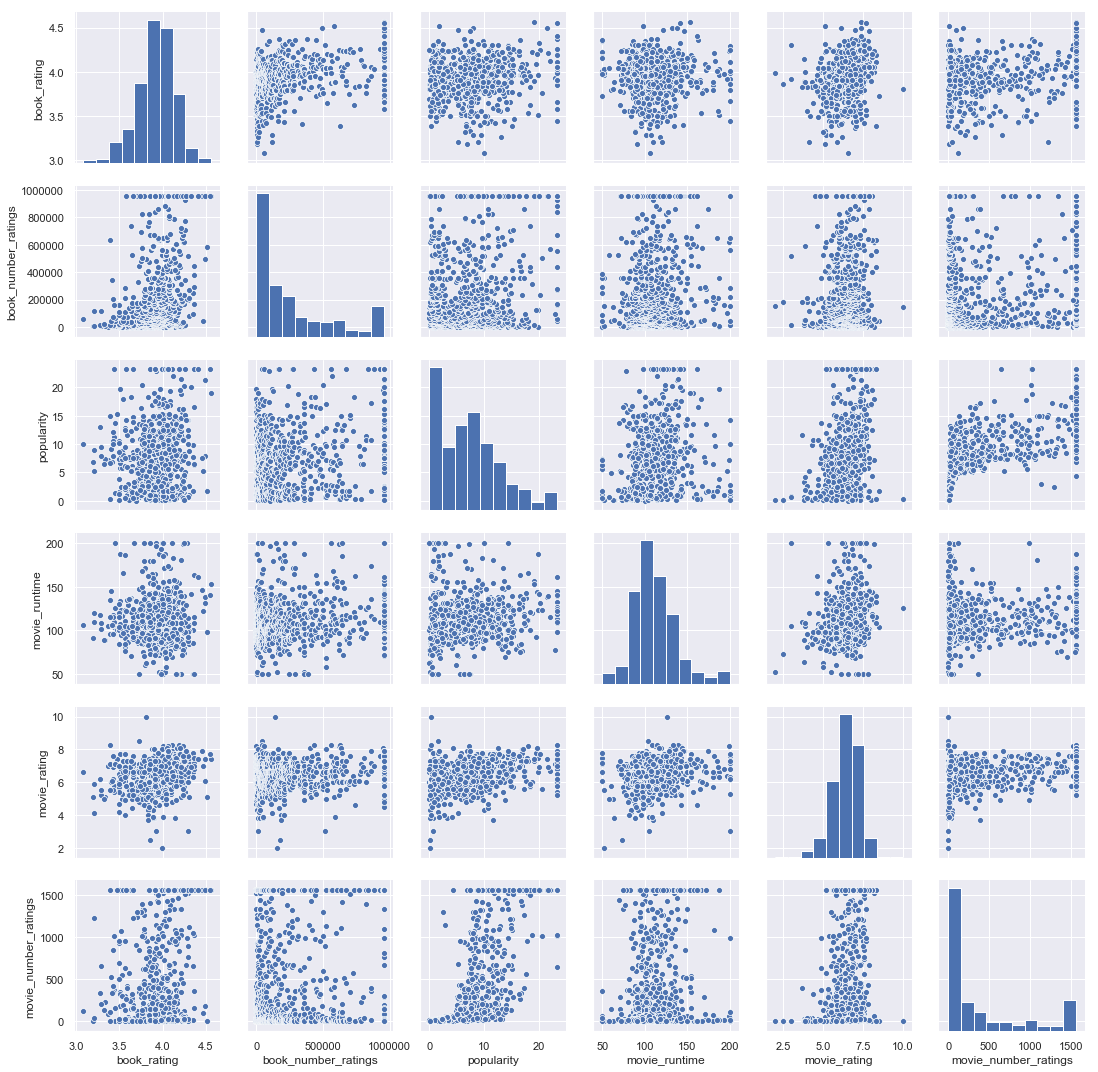

In [6]:
sns.pairplot(smaller_df);

In [7]:
#Separate our features from our target

X = smaller_df.loc[:,['book_rating', 'book_number_ratings', 'popularity', 'movie_runtime', 'movie_number_ratings']]

y = smaller_df['movie_rating']


In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [9]:
selected_columns = ['book_rating', 'book_number_ratings', 'popularity', 'movie_runtime', 'movie_number_ratings']

In [10]:
lasso_model = Lasso(alpha = 1000)
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
list(zip(selected_columns, lasso_model.coef_))

[('book_rating', 0.0),
 ('book_number_ratings', 3.490448078791529e-07),
 ('popularity', 0.0),
 ('movie_runtime', 0.0),
 ('movie_number_ratings', 0.0)]

In [14]:
np.random.seed(6)

X_train_collinear = X_train.loc[:,selected_columns]

X_train_collinear.corr() #notice .95 correlation b/w Lot Area and its "clone"

,book_rating,book_number_ratings,popularity,movie_runtime,movie_number_ratings
book_rating,1.000000,0.310696,0.144112,0.028831,0.188190
book_number_ratings,0.310696,1.000000,0.096198,0.074125,0.127486
popularity,0.144112,0.096198,1.000000,0.153105,0.764751
movie_runtime,0.028831,0.074125,0.153105,1.000000,0.132338
movie_number_ratings,0.188190,0.127486,0.764751,0.132338,1.000000


In [15]:

import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train_collinear))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           movie_rating   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     16.87
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           3.61e-15
Time:                        16:40:52   Log-Likelihood:                -525.82
No. Observations:                 414   AIC:                             1064.
Df Residuals:                     408   BIC:                             1088.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.2724      0.851      2.671      0.008       0.600       3.945
book_rating              0.8630      0.215      4.018      0.000       0.441       1.285
book_number_ratings   1.317e-08   1.57e-07      0.084      0.933   -2.95e-07    3.22e-07
popularity               0.0140      0.012      1.205      0.229      -0.009       0.037
movie_runtime            0.0045      0.002      2.748      0.006       0.001       0.008
movie_number_ratings     0.0004      0.000      3.136      0.002       0.000       0.001
==============================================================================
Omnibus:                       46.013   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.393
Skew:                          -0.493   Prob(JB):                     1.46e-30
Kurtosis:                       5.644   Cond. No.                     8.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
lr_model_ridge = Ridge(alpha = 10000)
lr_model_ridge.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_ridge.coef_))

[('book_rating', 0.0014071530826776553),
 ('book_number_ratings', 1.9868850193197085e-07),
 ('popularity', 0.005087628750620613),
 ('movie_runtime', 0.0043409732088450104),
 ('movie_number_ratings', 0.0005188789098300489)]

In [17]:
lr_model_lasso = Lasso(alpha = 100)
lr_model_lasso.fit(X_train_collinear, y_train)

list(zip(X_train_collinear.columns, lr_model_lasso.coef_))

[('book_rating', 0.0),
 ('book_number_ratings', 3.0565122856048106e-07),
 ('popularity', 0.0),
 ('movie_runtime', 0.0),
 ('movie_number_ratings', 0.00022970358598413287)]

In [18]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

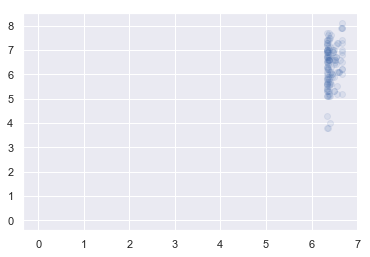

In [19]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,6,1), np.linspace(0,6,1));

In [20]:
#r-squared
r2_score(y_test, test_set_pred)

0.030112832328559436

In [21]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

0.6639127305899727

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train.values)

In [25]:
## Apply the scaler to the test set

X_te = std.transform(X_test.values)

In [26]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

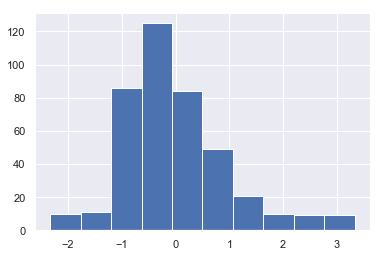

In [27]:
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)

plt.hist(X_tr[:,3]);

In [28]:
## Fit a LASSO model on the standardized data

lasso_model = Lasso(alpha = 100)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
list(zip(X_train.columns, lasso_model.coef_))

[('book_rating', 0.0),
 ('book_number_ratings', 0.0),
 ('popularity', 0.0),
 ('movie_runtime', 0.0),
 ('movie_number_ratings', 0.0)]

In [30]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

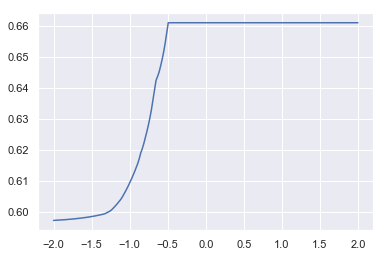

In [31]:
plt.plot(np.log10(alphalist), err_vec_val);

In [32]:
np.min(err_vec_val)

0.5973119075527072

In [33]:
alphalist[np.argmin(err_vec_val)]

0.01

In [34]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [36]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000e-02, 1.04737e-02, ..., 9.54772e+01, 1.00000e+02]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [37]:
lasso_model.alpha_

0.02523539170434766

In [38]:
list(zip(X_train.columns, lasso_model.coef_))

[('book_rating', 0.16259433248905514),
 ('book_number_ratings', 0.0),
 ('popularity', 0.06841747112011624),
 ('movie_runtime', 0.09749852597575205),
 ('movie_number_ratings', 0.20022722433304138)]

In [39]:
test_set_pred = lasso_model.predict(X_te)

In [40]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

0.592724519018086

In [41]:
r2_score(y_test, test_set_pred)

0.2045307658417106

In [42]:

from sklearn.linear_model import lars_path

In [43]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:

X_tr = std.transform(X_train.values)

In [45]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

Computing regularization path using the LARS ...


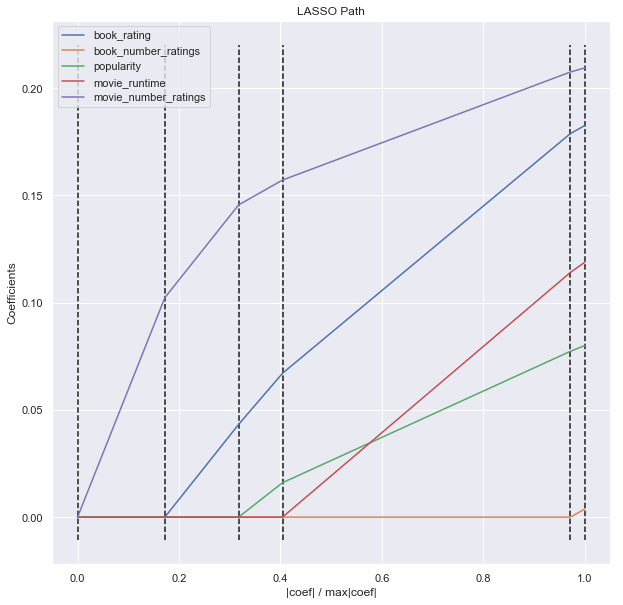

In [46]:

# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()